In [1]:
%install-swiftpm-flags -c release
%install '.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")' SwiftProtobuf
import SwiftProtobuf

Installing packages:
	.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")
		SwiftProtobuf
With SwiftPM flags: ['-c', 'release']
Working in: /tmp/tmpcefbp4ia/swift-install
Fetching https://github.com/apple/swift-protobuf.git
Cloning https://github.com/apple/swift-protobuf.git
Resolving https://github.com/apple/swift-protobuf.git at 1.7.0
[1/2] Compiling SwiftProtobuf AnyMessageStorage.swift
[2/3] Compiling jupyterInstalledPackages jupyterInstalledPackages.swift
[3/3] Linking libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


In [2]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [3]:
import Python
import TensorFlow

In [4]:
let plt = Python.import("matplotlib.pyplot")

In [5]:
let SAMPLE_SIZE = 100

let a: Float = 2.0
let b: Float = 1.5
let x = Tensor<Float>(rangeFrom: 0, to: 1, stride: 1.0 / Float(SAMPLE_SIZE))
let noise = (Tensor<Float>(randomNormal: [SAMPLE_SIZE]) - 0.5) * 0.1
let y = (a * x + b) + noise

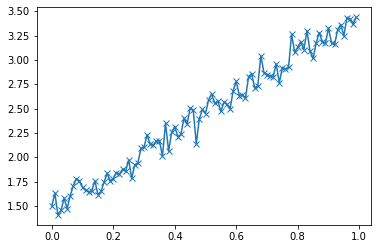

None


In [6]:
plt.clf()
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), marker: "x")
plt.show()

In [7]:
print(x.shape)
print(y.shape)

[100]
[100]


In [8]:
let X = x.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
let Y = y.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
print(X.shape)
print(Y.shape)

[100, 1]
[100, 1]


In [9]:
struct LinearRegression: Layer {
    var layer1 = Dense<Float>(inputSize: 1, outputSize: 1, activation: identity)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer1(input)
    }
}


In [10]:
var regression = LinearRegression()
let optimizer = SGD(for: regression, learningRate: 0.03)
Context.local.learningPhase = .training

In [11]:
for _ in 0..<1000 {
    let 𝛁model = regression.gradient { r -> Tensor<Float> in
        let ŷ = r(X)
        let loss = meanSquaredError(predicted: ŷ, expected: Y)
        print("Loss: \(loss)")
        return loss
    }
    optimizer.update(&regression, along: 𝛁model)
}

Loss: 2.6348794
Loss: 2.2535057
Loss: 1.9277045
Loss: 1.6493759
Loss: 1.4116015
Loss: 1.2084711
Loss: 1.034935
Loss: 0.8866804
Loss: 0.76002276
Loss: 0.6518146
Loss: 0.55936676
Loss: 0.4803828
Loss: 0.4129002
Loss: 0.3552429
Loss: 0.30597895
Loss: 0.2638852
Loss: 0.22791657
Loss: 0.1971806
Loss: 0.1709146
Loss: 0.14846732
Loss: 0.12928219
Loss: 0.11288387
Loss: 0.098866224
Loss: 0.08688242
Loss: 0.07663607
Loss: 0.06787403
Loss: 0.060380027
Loss: 0.053969372
Loss: 0.048484154
Loss: 0.043789644
Loss: 0.039770674
Loss: 0.036328826
Loss: 0.03338005
Loss: 0.030852562
Loss: 0.028685017
Loss: 0.02682503
Loss: 0.02522786
Loss: 0.023855252
Loss: 0.022674536
Loss: 0.021657815
Loss: 0.020781253
Loss: 0.02002449
Loss: 0.019370107
Loss: 0.018803287
Loss: 0.018311305
Loss: 0.01788331
Loss: 0.017510038
Loss: 0.017183587
Loss: 0.016897187
Loss: 0.01664505
Loss: 0.01642225
Loss: 0.01622458
Loss: 0.016048424
Loss: 0.01589071
Loss: 0.015748793
Loss: 0.015620439
Loss: 0.015503735
Loss: 0.015397031
Loss: 

Loss: 0.008885237
Loss: 0.0088840565
Loss: 0.008882884
Loss: 0.008881719
Loss: 0.008880568
Loss: 0.008879423
Loss: 0.008878288
Loss: 0.008877159
Loss: 0.008876042
Loss: 0.008874933
Loss: 0.008873833
Loss: 0.008872739
Loss: 0.008871656
Loss: 0.008870584
Loss: 0.008869518
Loss: 0.008868457
Loss: 0.008867411
Loss: 0.008866369
Loss: 0.008865335
Loss: 0.0088643115
Loss: 0.0088632945
Loss: 0.008862289
Loss: 0.008861286
Loss: 0.008860293
Loss: 0.00885931
Loss: 0.008858334
Loss: 0.00885736
Loss: 0.008856404
Loss: 0.008855446
Loss: 0.008854501
Loss: 0.008853558
Loss: 0.008852631
Loss: 0.008851706
Loss: 0.008850787
Loss: 0.008849878
Loss: 0.008848977
Loss: 0.008848088
Loss: 0.008847194
Loss: 0.008846315
Loss: 0.008845437
Loss: 0.008844573
Loss: 0.008843716
Loss: 0.008842861
Loss: 0.00884201
Loss: 0.00884117
Loss: 0.008840336
Loss: 0.008839512
Loss: 0.008838692
Loss: 0.008837879
Loss: 0.008837068
Loss: 0.008836268
Loss: 0.008835472
Loss: 0.008834686
Loss: 0.008833903
Loss: 0.008833128
Loss: 0.008

In [12]:
let weight = Float(regression.layer1.weight[0][0])!
let bias = Float(regression.layer1.bias[0])!
print(weight, bias)

2.0088403 1.4504199


In [13]:
Context.local.learningPhase = .inference
let score = regression(X)
let y2 = score.reshaped(toShape: [100])

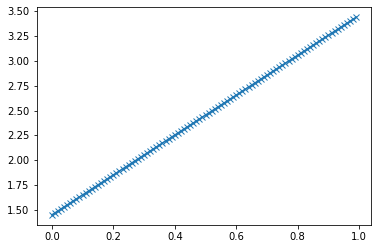

None


In [14]:
plt.clf()
plt.plot(x.makeNumpyArray(), y2.makeNumpyArray(), marker: "x")
plt.show()

In [15]:
%include "./CoreMLProto/ArrayFeatureExtractor.pb.swift"

In [16]:
%include "./CoreMLProto/BayesianProbitRegressor.pb.swift"

In [17]:
%include "./CoreMLProto/DataStructures.pb.swift"

In [18]:
%include "./CoreMLProto/CategoricalMapping.pb.swift"

In [19]:
%include "./CoreMLProto/CustomModel.pb.swift"

In [20]:
%include "./CoreMLProto/DictVectorizer.pb.swift"

In [21]:
%include "./CoreMLProto/FeatureTypes.pb.swift"

In [22]:
%include "./CoreMLProto/FeatureVectorizer.pb.swift"

In [23]:
%include "./CoreMLProto/GLMClassifier.pb.swift"

In [24]:
%include "./CoreMLProto/GLMRegressor.pb.swift"

In [25]:
%include "./CoreMLProto/Gazetteer.pb.swift"

In [26]:
%include "./CoreMLProto/Identity.pb.swift"

In [27]:
%include "./CoreMLProto/Imputer.pb.swift"

In [28]:
%include "./CoreMLProto/Scaler.pb.swift"

In [29]:
%include "./CoreMLProto/ItemSimilarityRecommender.pb.swift"

In [30]:
%include "./CoreMLProto/Parameters.pb.swift"

In [31]:
%include "./CoreMLProto/Normalizer.pb.swift"

In [32]:
%include "./CoreMLProto/LinkedModel.pb.swift"

In [33]:
%include "./CoreMLProto/NearestNeighbors.pb.swift"

In [34]:
%include "./CoreMLProto/NonMaximumSuppression.pb.swift"

In [35]:
%include "./CoreMLProto/OneHotEncoder.pb.swift"

In [36]:
%include "./CoreMLProto/SVM.pb.swift"

In [37]:
%include "./CoreMLProto/SoundAnalysisPreprocessing.pb.swift"

In [38]:
%include "./CoreMLProto/TextClassifier.pb.swift"

In [39]:
%include "./CoreMLProto/TreeEnsemble.pb.swift"

In [40]:
%include "./CoreMLProto/VisionFeaturePrint.pb.swift"

In [41]:
%include "./CoreMLProto/WordEmbedding.pb.swift"

In [42]:
%include "./CoreMLProto/WordTagger.pb.swift"

In [43]:
%include "./CoreMLProto/NeuralNetwork.pb.swift"

In [44]:
%include "./CoreMLProto/Model.pb.swift"

In [54]:
let coreModel = CoreML_Specification_Model.with {
    $0.specificationVersion = 4
    $0.description_p = CoreML_Specification_ModelDescription.with {
        $0.input = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.output = [CoreML_Specification_FeatureDescription.with {
            $0.name = "output"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.trainingInput = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }, CoreML_Specification_FeatureDescription.with {
            $0.name = "output_true"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }

        }]
        $0.metadata = CoreML_Specification_Metadata.with {
            $0.shortDescription = "Trivial linear classifier"
            $0.author = "Jacopo Mangiavacchi"
            $0.license = "MIT"
            $0.userDefined = ["coremltoolsVersion" : "3.1"]
        }
    }
    $0.isUpdatable = true
    $0.neuralNetwork = CoreML_Specification_NeuralNetwork.with {
        $0.layers = [CoreML_Specification_NeuralNetworkLayer.with {
            $0.name = "dense_1"
            $0.input = ["dense_input"]
            $0.output = ["output"]
            $0.isUpdatable = true
            $0.innerProduct = CoreML_Specification_InnerProductLayerParams.with {
                $0.inputChannels = 1
                $0.outputChannels = 1
                $0.hasBias_p = true
                $0.weights = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [weight]
                    $0.isUpdatable = true
                }
                $0.bias = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [bias]
                    $0.isUpdatable = true
                }
            }
        }]
        $0.updateParams = CoreML_Specification_NetworkUpdateParameters.with {
            $0.lossLayers = [CoreML_Specification_LossLayer.with {
                $0.name = "lossLayer"
                $0.meanSquaredErrorLossLayer = CoreML_Specification_MeanSquaredErrorLossLayer.with {
                    $0.input = "output"
                    $0.target = "output_true"
                }
            }]
            $0.optimizer = CoreML_Specification_Optimizer.with {
                $0.sgdOptimizer = CoreML_Specification_SGDOptimizer.with {
                    $0.learningRate = CoreML_Specification_DoubleParameter.with {
                        $0.defaultValue = 0.01
                        $0.range = CoreML_Specification_DoubleRange.with {
                            $0.maxValue = 1.0
                        }
                    }
                    $0.miniBatchSize = CoreML_Specification_Int64Parameter.with {
                        $0.defaultValue = 5
                        $0.set = CoreML_Specification_Int64Set.with {
                            $0.values = [5]
                        }
                    }
                    $0.momentum = CoreML_Specification_DoubleParameter.with {
                        $0.defaultValue = 0
                        $0.range = CoreML_Specification_DoubleRange.with {
                            $0.maxValue = 1.0
                        }
                    }
                }
            }
            $0.epochs = CoreML_Specification_Int64Parameter.with {
                $0.defaultValue = 2
                $0.set = CoreML_Specification_Int64Set.with {
                    $0.values = [2]
                }
            }
            $0.shuffle = CoreML_Specification_BoolParameter.with {
                $0.defaultValue = true
            }
        }
    }
}

In [55]:
let binaryModelData: Data = try coreModel.serializedData()

In [56]:
binaryModelData.write(to: URL(fileURLWithPath: "./s4tf_model_personalization.mlmodel"))